In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataset=pd.read_csv(r"E:\tops\Data science\practical\Regularization\houseprice.csv")
dataset.head(3)

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007


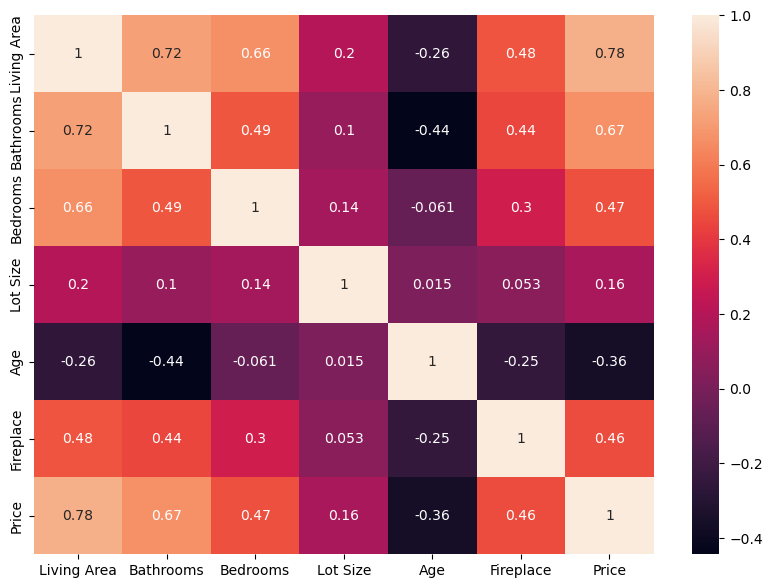

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [38]:
x=dataset.iloc[:,:-1]
y=dataset["Price"]

In [39]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# LinearRegression

In [60]:
from sklearn.linear_model import LinearRegression , Lasso ,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [23]:
lr=LinearRegression()
la=Lasso()
ri=Ridge()

In [63]:
lr.fit(x_train,y_train)

LinearRegression()

In [67]:
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(mean_squared_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))


2.8710764007435836
17.38203863887801
4.169177213657152


In [26]:
lr.score(x_test,y_test)*100

64.77745304733608

In [28]:
lr.coef_

array([ 4.1649387 ,  1.28672069, -0.40813207,  0.20617446, -0.64576019,
        0.41390807])

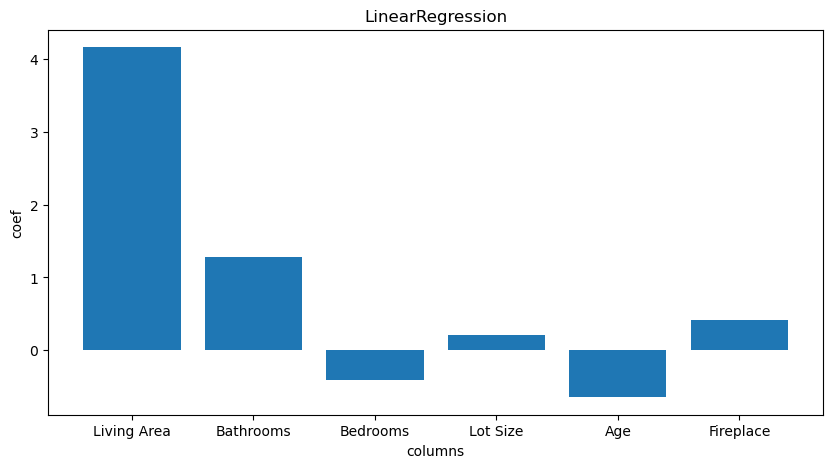

In [32]:
plt.figure(figsize=(10,5))
plt.title("LinearRegression")
plt.bar(x.columns,lr.coef_)
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# lasso

In [51]:
la=Lasso(alpha=0.01)

In [69]:
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

64.78261651114968

In [70]:
print(mean_absolute_error(y_test,la.predict(x_test)))
print(mean_squared_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))


2.868740603588553
17.379490511746862
4.168871611329241


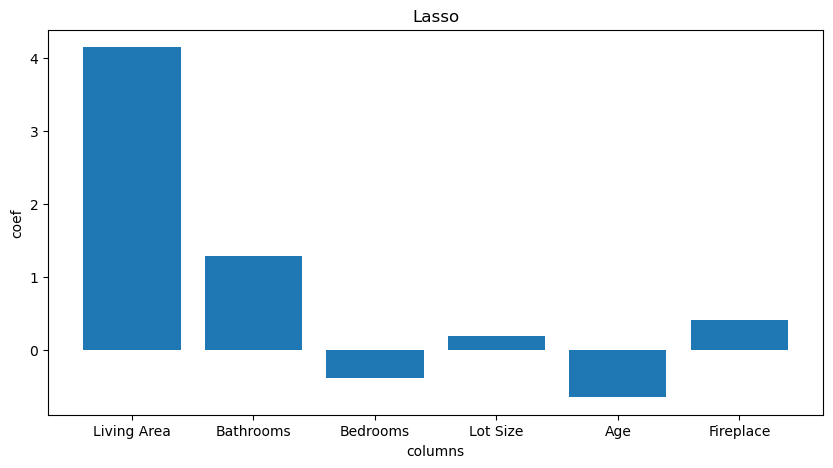

In [53]:
plt.figure(figsize=(10,5))
plt.title("Lasso")
plt.bar(x.columns,la.coef_)
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

# Ridge

In [71]:
ri=Ridge(alpha=0.10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

64.77687555810589

In [72]:
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(mean_squared_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))


2.8711150322513297
17.382323625086602
4.169211391268929


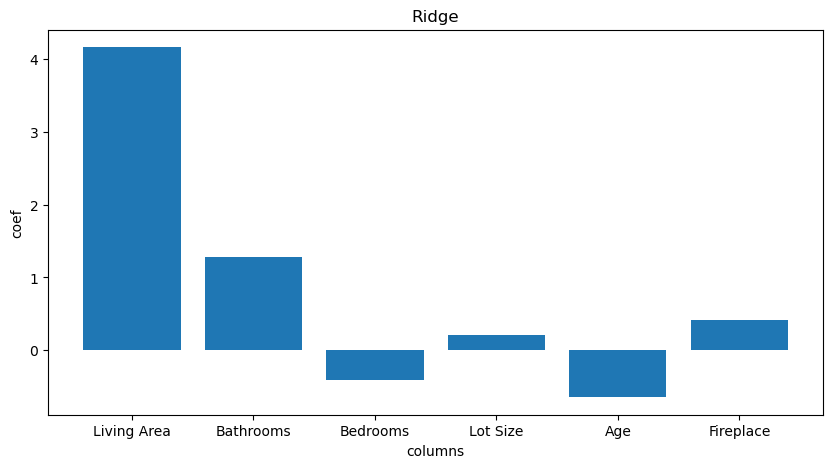

In [59]:
plt.figure(figsize=(10,5))
plt.title("Ridge")
plt.bar(x.columns,ri.coef_)
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [74]:
df=pd.DataFrame({"call_name":x.columns,"LinearRegression":lr.coef_,"lasso":la.coef_,"ridge":ri.coef_})

In [75]:
df.head()


,call_name,LinearRegression,lasso,ridge
0,Living Area,4.164939,4.142708,4.163575
1,Bathrooms,1.286721,1.281507,1.287083
2,Bedrooms,-0.408132,-0.377879,-0.407439
3,Lot Size,0.206174,0.195580,0.206259
4,Age,-0.645760,-0.643182,-0.645769
